# DESCRIPTION

## Objective: Make a model to predict the app rating, with other information about the app provided.

### Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

### Domain: General

Analysis to be done: The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

### Fields in the data –

    App: Application name

    Category: Category to which the app belongs 

    Rating: Overall user rating of the app

    Reviews: Number of user reviews for the app

    Size: Size of the app

    Installs: Number of user downloads/installs for the app

    Type: Paid or Free

    Price: Price of the app

    Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

    Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.

    Last Updated: Date when the app was last updated on Play Store

    Current Ver: Current version of the app available on Play Store

    Android Ver: Minimum required Android version


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Steps to perform:

## 1. Load the data file using pandas. 

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 2. Check for null values in the data. Get the number of null values for each column.

Dropping the records with null ratings
- this is done because ratings is our target variable

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 3. Drop records with nulls in any of the columns. 

In [6]:
df.dropna(how = 'any', inplace = True)

In [7]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Confirming that the null records have been dropped

#### Change variable to correct types

In [8]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 4.	Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 


#### 4.4 Price column needs to be cleaned

In [9]:
df.Price.value_counts()[:5]

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: Price, dtype: int64

Some have dollars, some have 0
- we need to conditionally handle this
- first, let's modify the column to take 0 if value is 0, else take the first letter onwards

In [10]:
# Write a function named 'clean_price' if price is 0 it remains 0 otherwise delete the $

# delete the $ = removing the element at index 0

'$2.99'[1:] # example
float('$2.99'[1:])

# use map to apply the function to the column as shown in the last line no. 9
                    
# inp0['Price'] = inp0.Price.map(clean_price)

def clean_price(x):
    if x.startswith('$'):
        x = x[1:]
        return x
    else:
        return x

df['Price'] = df.Price.map(clean_price)

In [11]:
df.Price.value_counts()[:5]

0       8715
2.99     114
0.99     106
4.99      70
1.99      59
Name: Price, dtype: int64

In [12]:
df['Price'] = df['Price'].astype('float')

#### 4.2 Converting reviews to numeric

In [13]:
# use astype("int32")

In [14]:
df['Reviews'] = df['Reviews'].astype('float')

In [15]:
df.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

#### 4.3 Now, handling the installs column

In [16]:
df.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

##### We'll need to remove the commas and the plus signs

Defining function for the same

In [17]:
# define a function 'clean_installs' where replace(",","") and replace("+","")

def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [18]:
# use map to apply the function to the column as shown earlier
df.Installs = df.Installs.map(clean_installs)

In [19]:
df.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

### 4.1 Handling the app size field

In [20]:
# write a function 'change_size', 
# if there is M which is size in MB, delete the last element, mutiply it with 1000 and convert it to float 
# if there is k which is size in kB, delete the last element and convert it to float
# otherwise return None

def change_size(size):
    if "M" in size:
        x = size[:-1] # start : stop - 1
        x = float(x)*1000
        return x
    elif 'k' in size[-1]:
        x = size[:-1]
        x = float(x)
        return x
    else:
        return None        

In [21]:
change_size("19k")

19.0

In [22]:
"19k"[-1]

'k'

In [23]:
# use map to apply the function to the column as shown earlier
df["Size"] = df["Size"].map(change_size)

In [24]:
df.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [25]:
df["Size"].isnull().sum()

1637

In [26]:
# filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True) # the missing values are introduced when we are working on the data type

In [27]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 5. Some sanity checks
1.	Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
2.	Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
3.	For free apps (type = “Free”), the price should not be >0. Drop any such rows.

#### 5.1 	Avg. rating should be between 1 and 5, as only these values are allowed on the play store. Drop any rows that have a value outside this range.

In [28]:
df.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Min is 1 and max is 5. Looks good.

In [29]:
df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### 5.2.	Reviews should not be more than installs as only those who installed can review the app.

Checking if reviews are more than installs. Counting total rows like this.

In [30]:
len(df[df['Reviews'] > df['Installs']])

7

In [31]:
df[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [32]:
# work with the code used to drop the outliers in Missing Value and Outlier Treatment file

In [33]:
df = df[df['Reviews'] <= df['Installs']]

In [34]:
df.shape

(9353, 13)

### 5.3 For free apps (type = “Free”), the price should not be > 0. Drop any such rows.

In [35]:
len(df[(df.Type == "Free") & (df.Price>0)])

0

## 5.A. Performing univariate analysis:
5.A. Performing univariate analysis: 
-	Boxplot for Price
o	Are there any outliers? Think about the price of usual apps on Play Store.
-	Boxplot for Reviews
o	Are there any apps with very high number of reviews? Do the values seem right?
-	Histogram for Rating
o	How are the ratings distributed? Is it more toward higher ratings?
-	Histogram for Size
### Note down your observations for the plots made above. Which of these seem to have outliers?


#### Box plot for price
o	Are there any outliers? Think about the price of usual apps on Play Store.

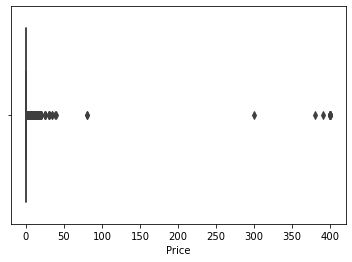

In [36]:
sns.boxplot(df.Price);

## **Analysis:**

**Yes, there are outliers. The price of apps are usually lesser than $50. Hence the price of other apps seem to be outliers.**

#### Box plot for Reviews
o	Are there any apps with very high number of reviews? Do the values seem right?


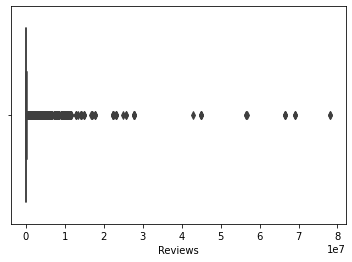

In [37]:
sns.boxplot(df.Reviews);

## Analysis:

**Yes, based on the above Box Plot, there seem to be some apps with higher number of reviews.**

#### Histogram for Rating
o	How are the ratings distributed? Is it more toward higher ratings?


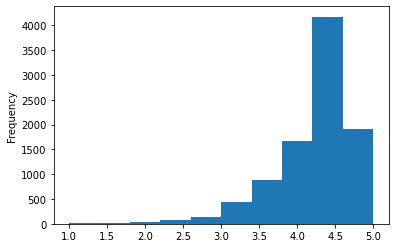

In [38]:
df.Rating.plot.hist();

## **Analysis:**

**Yes, based on the above histogram, the Ratings are above 4.0 for a lot of apps.**

#### Histogram of Size

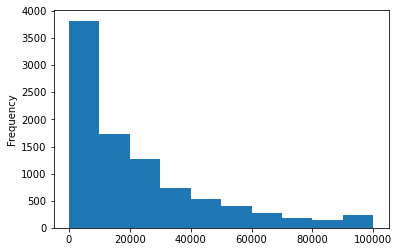

In [39]:
df.Size.plot.hist();

## 6. Outlier treatment: 
1.	Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
    a.	Check out the records with very high price
        i.	Is 200 indeed a high price?
    b.	Drop these as most seem to be junk apps
2.	Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.
3.	Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
        a.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
        b.	Decide a threshold as cutoff for outlier and drop records having values more than that


#### 6.1.	Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
    a.	Check out the records with very high price
        i.	Is 200 indeed a high price?
    b.	Drop these as most seem to be junk apps

In [40]:
len(df[df['Price'] >= 200])

15

In [41]:
df = df[df['Price'] < 200]

In [42]:
df.shape

(9338, 13)

#### 6.2	Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [43]:
df = df[df['Reviews'] < 2000000]

In [44]:
df.shape

(8885, 13)

#### 6.3	Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
        a.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
        b.	Decide a threshold as cutoff for outlier and drop records having values more than that

Dropping very high Installs values

In [45]:
df.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [46]:
Q1 = df.Installs.quantile(0.25)
Q1

10000.0

In [47]:
Q3 = df.Installs.quantile(0.75)
Q3

5000000.0

In [48]:
IQR = Q3 - Q1
IQR

4990000.0

In [49]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(lower_limit)
print(upper_limit)

-7475000.0
12485000.0


In [50]:
len(df[df['Installs'] > 12485000.0])

389

In [51]:
len(df[df['Installs'] >= 100000000])

142

In [52]:
df = df[df['Installs'] < 100000000]

In [53]:
df.shape

(8743, 13)

Looks like there are just 1% apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.  
We need to drop these.


## 7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

    1.	Make scatter plot/joinplot for Rating vs. Price
        a.	What pattern do you observe? Does rating increase with price?
    2.	Make scatter plot/joinplot for Rating vs. Size
        a.	Are heavier apps rated better?
    3.	Make scatter plot/joinplot for Rating vs. Reviews
        a.	Does more review mean a better rating always?
    4.	Make boxplot for Rating vs. Content Rating
        a.	Is there any difference in the ratings? Are some types liked better?
    5.	Make boxplot for Ratings vs. Category
        a.	Which genre has the best ratings?

### For each of the plots above, note down your observation.


#### 7.1.	Make scatter plot/joinplot for Rating vs Price
    a.	What pattern do you observe? Does rating increase with price?


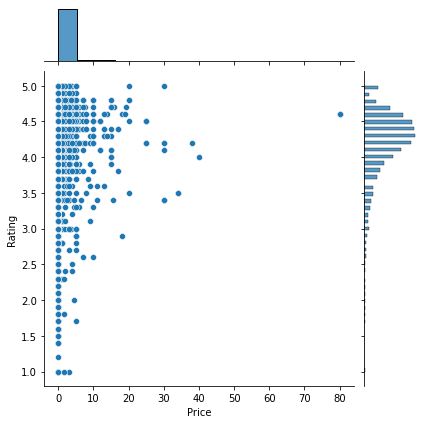

In [54]:
sns.jointplot(df.Price, df.Rating);

## Analysis:

**No, from the above plot, Rating does not increase with Price.**

#### 7.2	Make scatter plot/joinplot for Rating vs Size
     a.	Are heavier apps rated better?


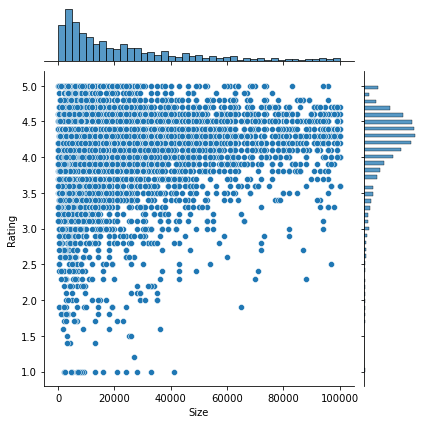

In [55]:
sns.jointplot(df.Size,df.Rating);

## Analysis:

**Yes, the above plot shows that the heavier apps are rated better.**

#### 7.3	Make scatter plot/joinplot for Rating vs Reviews
    a.	Does more review mean a better rating always?


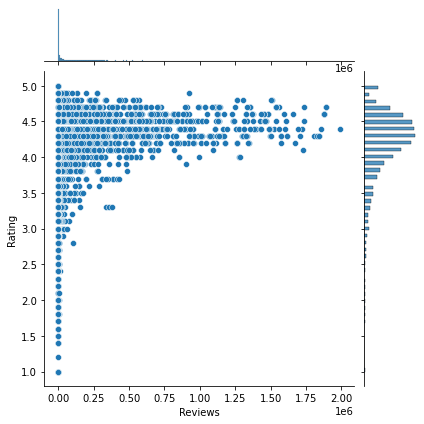

In [56]:
sns.jointplot(df.Reviews, df.Rating);

## Analysis:

**Yes, more the Reviews, higher the Ratings.**

#### 7.4	Make boxplot for Rating vs Content Rating
    a.	Is there any difference in the ratings? Are some types liked better?

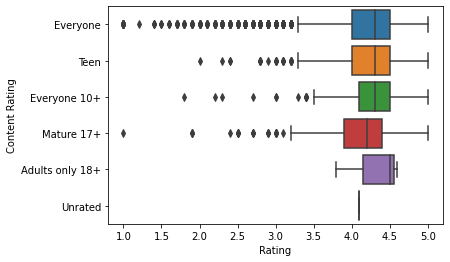

In [57]:
sns.boxplot(df.Rating, df['Content Rating']);

## Analysis:

**Apps with Content Rating as 'Everyone', 'Teen', 'Everyone 10+' and 'Adults only 18+' are liked better than 'Mature 17+' and 'Unrated'.**

#### 7.5	Make boxplot for Ratings vs. Category
    a.	Which genre has the best ratings?

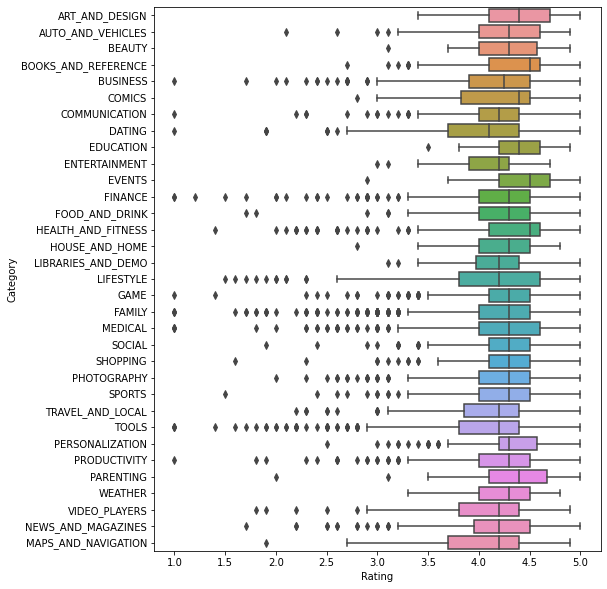

In [58]:
plt.figure(figsize=(8,10))
sns.boxplot(x=df['Rating'],y=df['Category']);
plt.show()

In [59]:
df2 = pd.DataFrame(df.groupby(['Category'])['Rating'].agg(np.median))
df2.loc[(df2['Rating'] == df2['Rating'].max())]

,Rating
Category,
BOOKS_AND_REFERENCE,4.5
EVENTS,4.5
HEALTH_AND_FITNESS,4.5


## Analysis:

**Apps under 'Books and Reference', 'Events' and 'Health & Fitness' have higher ratings than others.**

## 8 Data preprocessing
For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
1.	Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.
2.	Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
3.	Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.


**Making a copy of the dataset**

In [60]:
inp1 = df.copy()

#### 8.1	Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [61]:
# describe
inp1.Installs.describe()

count    8.743000e+03
mean     3.486865e+06
std      8.659419e+06
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      5.000000e+06
max      5.000000e+07
Name: Installs, dtype: float64

In [62]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [63]:
# Do the same thing for Reviews
inp1.Reviews.describe()

count    8.743000e+03
mean     8.957859e+04
std      2.320521e+05
min      1.000000e+00
25%      1.490000e+02
50%      3.878000e+03
75%      5.023650e+04
max      1.986068e+06
Name: Reviews, dtype: float64

In [64]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

#### 8.2	Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [65]:
inp1.shape

(8743, 13)

In [66]:
# ["App", "Last Updated", "Current Ver", "Android Ver"]
drop_columns = ['App', 'Last Updated', 'Current Ver', 'Android Ver']
inp1.drop(drop_columns, axis = 1, inplace = True)

In [67]:
inp1.shape

(8743, 9)

#### 8.3	Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

Getting dummy variables for Category, Genres, Content Rating

In [68]:
inp1.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [69]:
pd.get_dummies(inp1['Category'], prefix = 'Category', drop_first = True)

,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
inp1 = inp1.join(pd.get_dummies(inp1['Category'], prefix = 'Category', drop_first = True))
inp1.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_AUTO_AND_VEHICLES,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,0,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
pd.get_dummies(inp1['Genres'], prefix = 'Genres', drop_first = True)

,Genres_Action;Action & Adventure,Genres_Adventure,Genres_Adventure;Action & Adventure,Genres_Adventure;Brain Games,Genres_Adventure;Education,Genres_Arcade,Genres_Arcade;Action & Adventure,Genres_Arcade;Pretend Play,Genres_Art & Design,Genres_Art & Design;Creativity,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
inp1 = inp1.join(pd.get_dummies(inp1['Genres'], prefix = 'Genres', drop_first = True))
inp1.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_AUTO_AND_VEHICLES,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,0,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
pd.get_dummies(inp1['Content Rating'], prefix = 'Content Rating', drop_first = True)

,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10834,1,0,0,0,0
10836,1,0,0,0,0
10837,1,0,0,0,0
10839,0,0,1,0,0


In [74]:
inp1 = inp1.join(pd.get_dummies(inp1['Content Rating'], prefix = 'Content Rating', drop_first = True))
inp1.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_AUTO_AND_VEHICLES,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,0,...,0,0,0,0,0,1,0,0,0,0
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
inp1 = inp1.join(pd.get_dummies(inp1.Type, prefix = 'Type', drop_first = True))
inp1.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_AUTO_AND_VEHICLES,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Paid
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,0,...,0,0,0,0,1,0,0,0,0,0
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,0,...,0,0,0,0,1,0,0,0,0,0


In [76]:
drop_columns2 = ['Category','Type','Genres','Content Rating']
inp2 = inp1.drop(drop_columns2, axis =1)

In [77]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated', 'Type_Paid'],
      dtype='object', length=157)

In [78]:
inp2.shape

(8743, 157)

## 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

Train - test split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
df_train, df_test = train_test_split(inp2, test_size = 0.3, random_state =1)

In [81]:
display(df_train.shape)
display(df_test.shape)

(6120, 157)

(2623, 157)

In [82]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Paid
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [83]:
X_train = df_train.drop(['Rating'], axis = 1)

In [84]:
X_test = df_test.drop(['Rating'], axis = 1)

In [85]:
y_train = df_train['Rating']

In [86]:
y_test = df_test['Rating']

In [87]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(6120, 156)

(6120,)

(2623, 156)

(2623,)

## 11 . Model building
-	Use linear regression as the technique
-	Report the R2 on the train set


In [88]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression()

In [89]:
y_train_pred = linreg.predict(X_train)

In [90]:
from sklearn.metrics import r2_score

print(r2_score(y_train, y_train_pred))

0.1656451695716198


## 12. Make predictions on test set and report R2.

In [91]:
y_test_pred = linreg.predict(X_test)

In [92]:
print(r2_score(y_test, y_test_pred))

0.1382316733623684


## Mean Squared Error:

In [93]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_pred, y_test, squared = False)

0.4985860933341232